## Lecture 5 – CSCI 3022

by Maribeth Oscamou 
Adapted from material by Ani Adhikari, Suraj Rampure, and Fernando Pérez and Josh Hug and Narges Norouzi


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/var/folders/2p/d_nj_y2s0p32_2p156bn343c0000gn/T/ipykernel_27559/2370650137.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
births = pd.read_csv('data/baby.csv')

In [3]:
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [4]:
births.shape

(1174, 6)

## Bar Plots

We often use bar plots to display distributions of a categorical variable:

In [5]:
births['Maternal Smoker'].value_counts()

Maternal Smoker
False    715
True     459
Name: count, dtype: int64

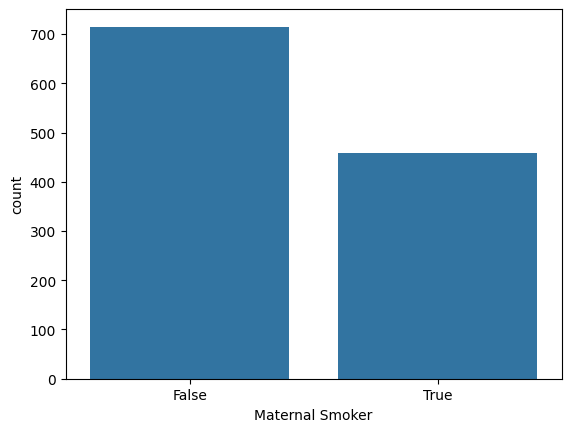

In [6]:
sns.countplot(data = births, x = 'Maternal Smoker');

In [7]:
import plotly.express as px
px.histogram(births, x = 'Maternal Smoker', color = 'Maternal Smoker')

/Users/abdullah/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


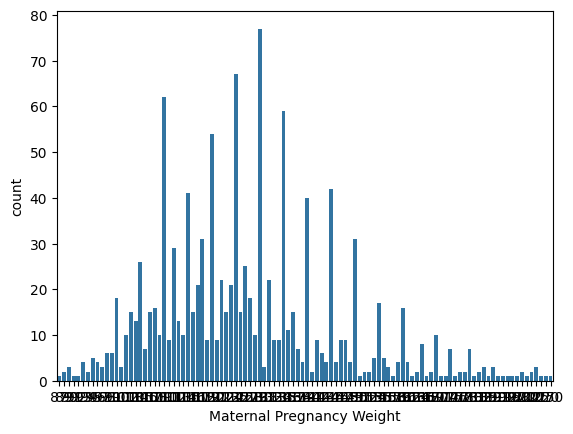

In [8]:
sns.countplot(data = births, x = 'Maternal Pregnancy Weight');

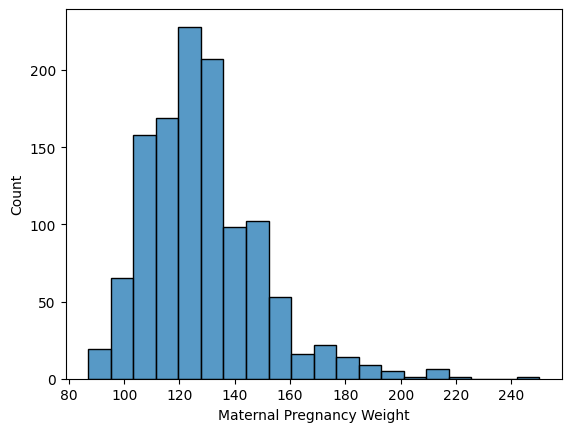

In [9]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', bins = 20);

In [10]:
px.histogram(births, x = 'Maternal Pregnancy Weight')

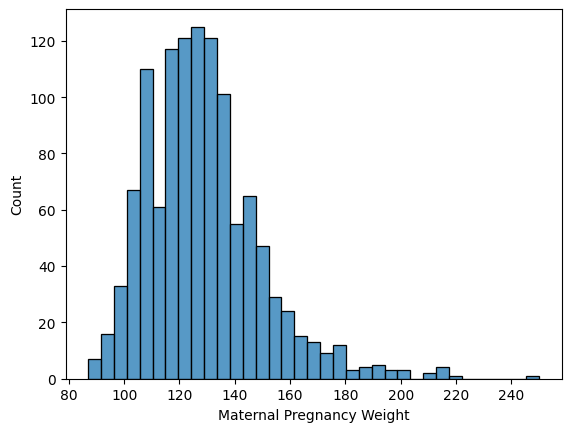

In [11]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight');

In [14]:
median = births['Maternal Pregnancy Weight'].median()
mean = births['Maternal Pregnancy Weight'].mean()

print("Median", median)
print("Mean", mean)

Median 125.0
Mean 128.4787052810903


<AxesSubplot:xlabel='Maternal Pregnancy Weight', ylabel='Density'>

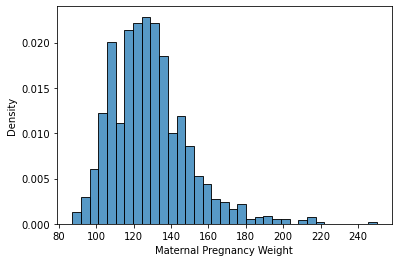

In [11]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', stat= 'density')

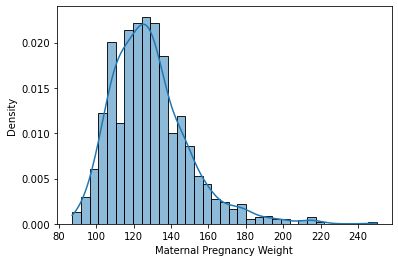

In [12]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', stat='density', kde = True);


105.0


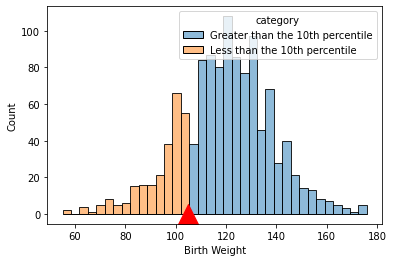

In [17]:
p10= np.percentile(births['Maternal Pregnancy Weight'], 10)


births['category'] = None
births.loc[(births['Birth Weight'] <= p10), 'category'] = 'Less than the 10th percentile'
births.loc[(births['Birth Weight'] > p10) , 'category'] = 'Greater than the 10th percentile'

sns.histplot(births, x = 'Birth Weight', hue = 'category', bins = 36);

births.drop(columns = ['category'], inplace = True)

#Mark the 10th percentile on the graph
plt.scatter(p10, -.01, marker='^', color='red', s=400)

print(p10) #this means that the ten percent of the data is below that point

[108.0, 120.0, 131.0]

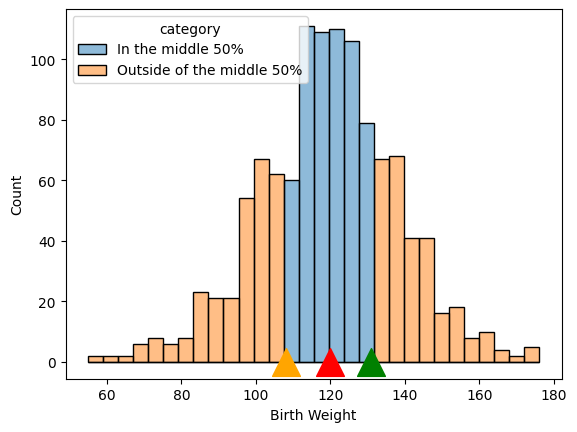

In [14]:
q1, median, q3 = np.percentile(births['Birth Weight'], [25, 50, 75])
iqr = q3 - q1

births['category'] = None
births.loc[(births['Birth Weight'] < q1) | (births['Birth Weight'] > q3), 'category'] = 'Outside of the middle 50%'
births.loc[(births['Birth Weight'] > q1) & (births['Birth Weight'] < q3), 'category'] = 'In the middle 50%'

sns.histplot(births, x = 'Birth Weight', hue = 'category', bins = 30);

births.drop(columns = ['category'], inplace = True)


plt.scatter(q1, -.01, marker='^', color='orange', s=400)

plt.scatter(median, -.01, marker='^', color='red', s=400)

plt.scatter(q3, -.01, marker='^', color='green', s=400)

display([q1, median, q3]) #this means that the first quartile (25th percebtile) which means that 25 percent of the data is below 108 ounces

#this also means that 50 percent of the data is below 120 ounces and 75 percent of the data is below 131 ounces which is the third quartile. Notice we are adding 25 in each case.

#second quartile

## Box Plots

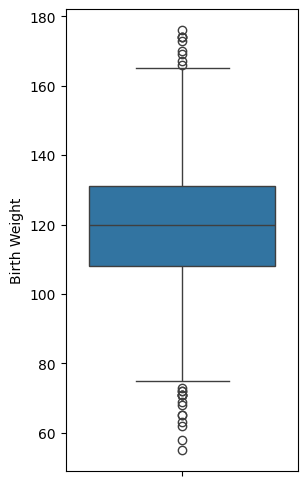

In [15]:
plt.figure(figsize = (3, 6))
sns.boxplot(data = births, y = 'Birth Weight');

#same data
#outliers: (q3- q1) * 1.5 data that is outside

In [16]:
bweights = births['Birth Weight']
q1 = np.percentile(bweights, 25)
q2 = np.percentile(bweights, 50)
q3 = np.percentile(bweights, 75)
iqr = q3 - q1
whisk1 = q1 - 1.5*iqr
whisk2 = q3 + 1.5*iqr

whisk1, q1, q2, q3, whisk2

(73.5, 108.0, 120.0, 131.0, 165.5)

## Violin Plots

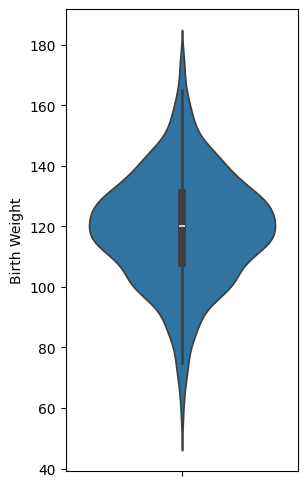

In [17]:
plt.figure(figsize = (3, 6))
sns.violinplot(data = births, y = 'Birth Weight');
#pretty much the same thing

In [18]:
#You can put a boxplot inside a violin plot...

px.violin(births, y = "Birth Weight", box=True, width=400)

## Side by side box plots and violin plots

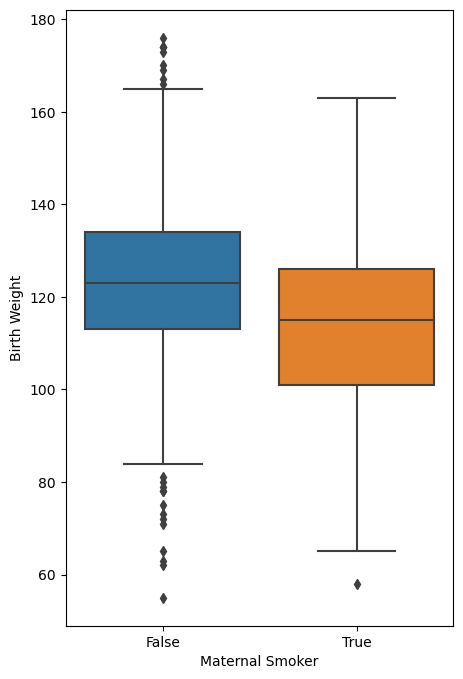

In [23]:
plt.figure(figsize=(5, 8))
sns.boxplot(data = births, x = 'Maternal Smoker', y = 'Birth Weight');

## Modes

**Mode**: a maximum found in the histogram. A graph with one single max is called unimodal and more than one is called bimodal


## Skew

**Positively Skewed**: When it has a long right tail. This means that the mode is closer to the left which means that the mean is to the right. Mean > Median.

**Negatively skewed**: long tail in the left. This means that the median is closer to the right which means that the mean is to the left. Median > Mean.

## Characteriziing Quantitative Data

**Mean**: Average.

**Median**: the element that is in the middle if it is in ascending order.

**Mode**: The most occuring element in the data set.

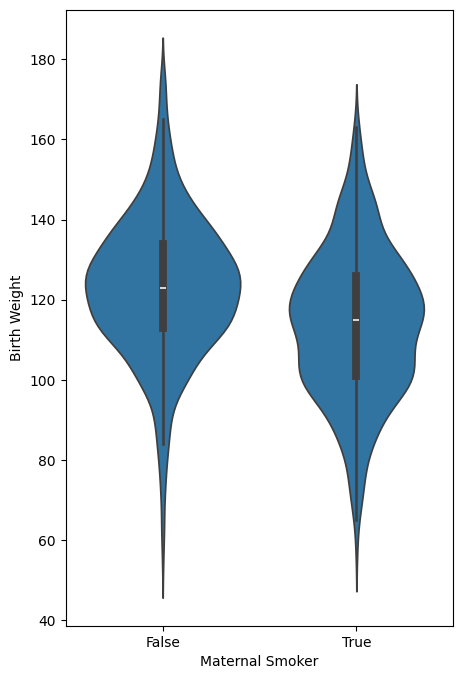

In [20]:
plt.figure(figsize=(5, 8))
sns.violinplot(data = births, x = 'Maternal Smoker', y = 'Birth Weight');

### Overlaid Histograms

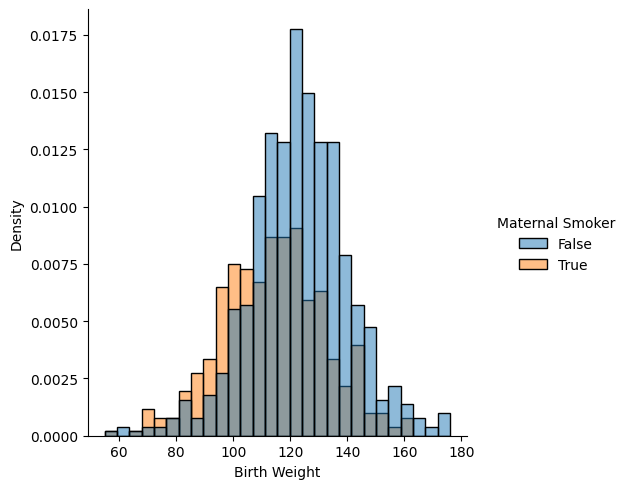

In [21]:
sns.displot(data = births, x = 'Birth Weight', stat = 'density', hue = 'Maternal Smoker');

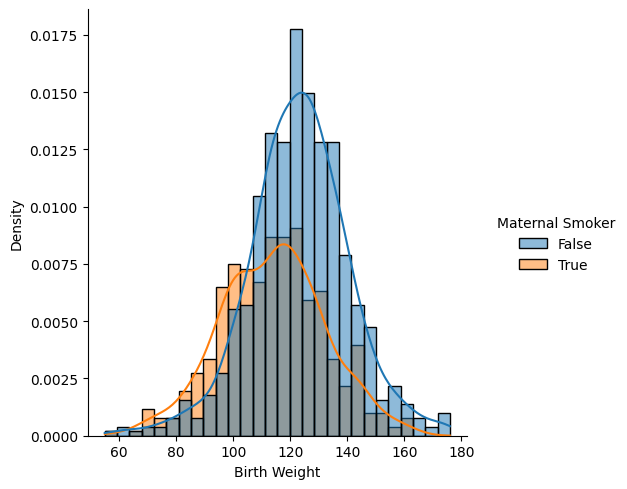

In [22]:
sns.displot(data = births, x = 'Birth Weight', kde = True, stat = 'density', hue = 'Maternal Smoker');

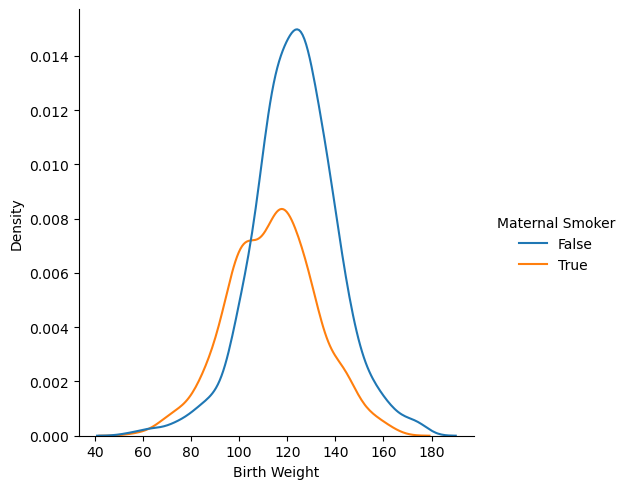

In [19]:
sns.displot(data = births, x = 'Birth Weight', kind = 'kde', hue = 'Maternal Smoker');

## Scatter plots

In [26]:
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


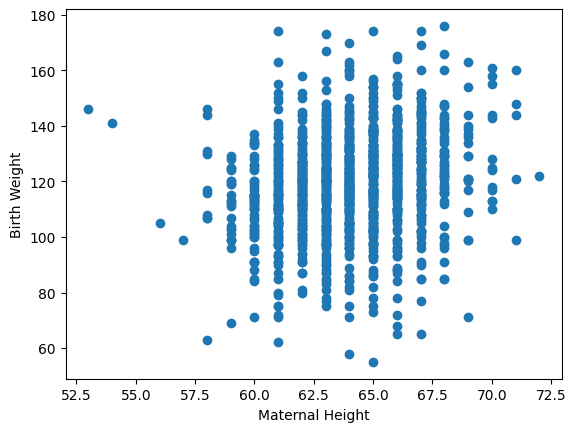

In [27]:
plt.scatter(births['Maternal Height'], births['Birth Weight']);
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');

Most `matplotlib` functions also accept a `data=` keyword, and when using this mode, you can then refer to x and y as names of columns in the `data` DataFrame, instead of passing the series explicitly:

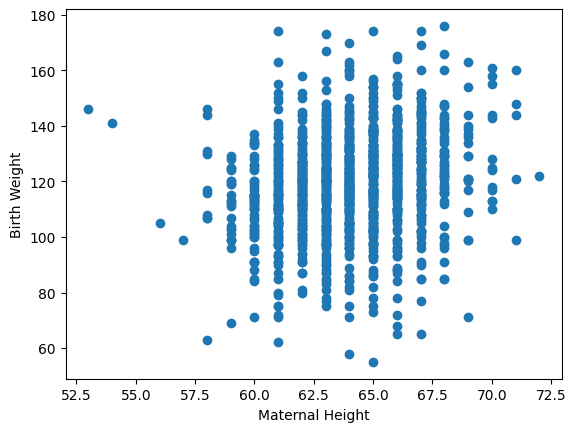

In [28]:
plt.scatter(data = births, x = 'Maternal Height', y = 'Birth Weight');
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');

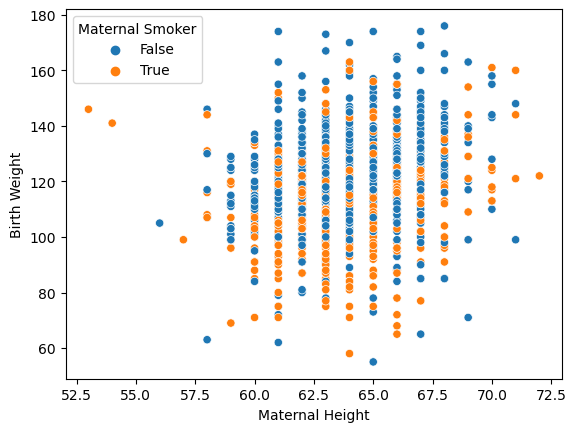

In [28]:
sns.scatterplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue = 'Maternal Smoker'); #not a good way of visualizing this data like this

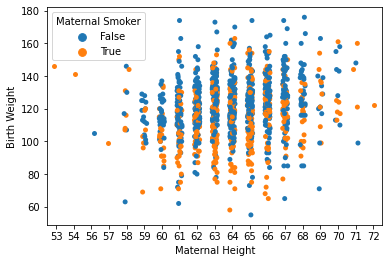

In [34]:
# We can add some "jittering" to the data to help deal with overplotting

sns.stripplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue = 'Maternal Smoker', jitter = 0.15);

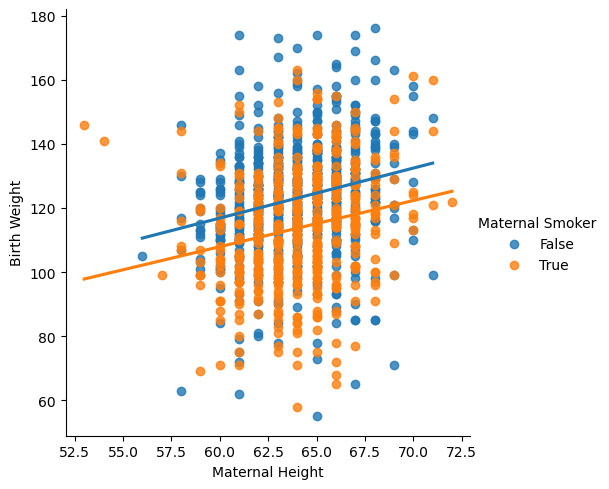

In [30]:
sns.lmplot(data = births, x = 'Maternal Height', y = 'Birth Weight', 
           ci = False, hue = 'Maternal Smoker');

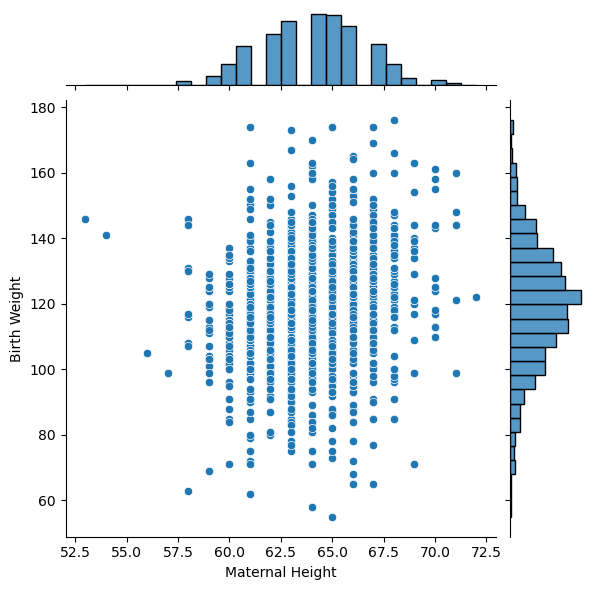

In [31]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight');

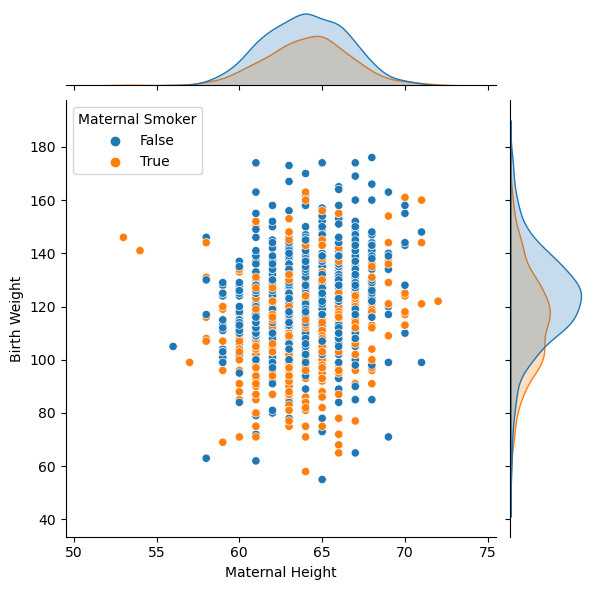

In [32]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue = 'Maternal Smoker');

## Hex plots and contour plots

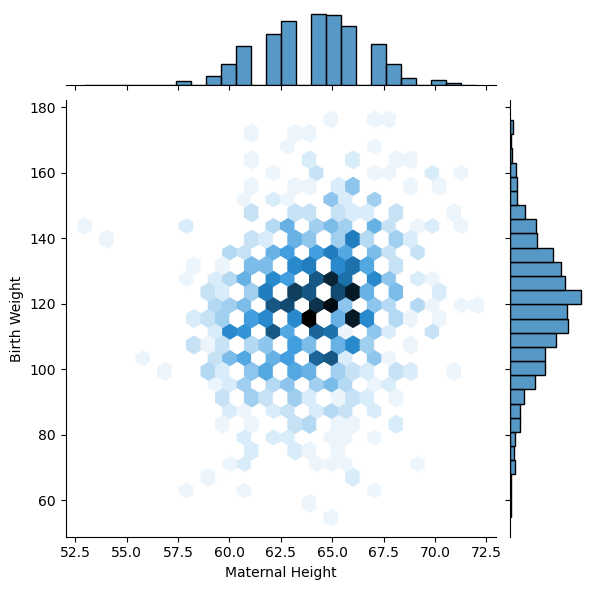

In [33]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind = 'hex');

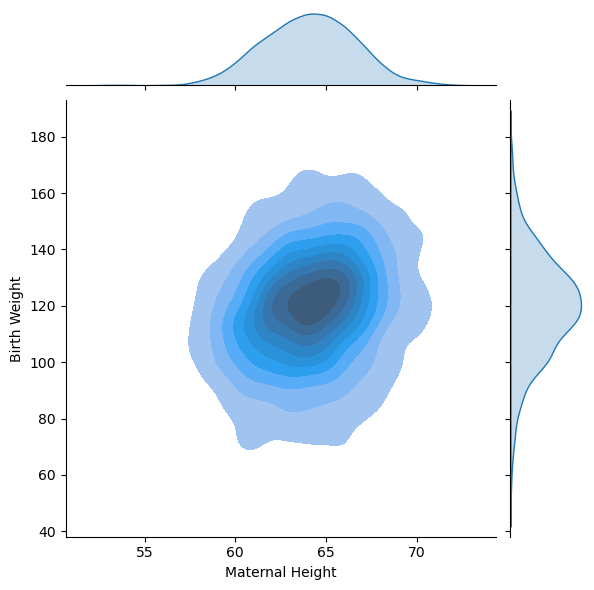

In [34]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind = 'kde', fill = True);

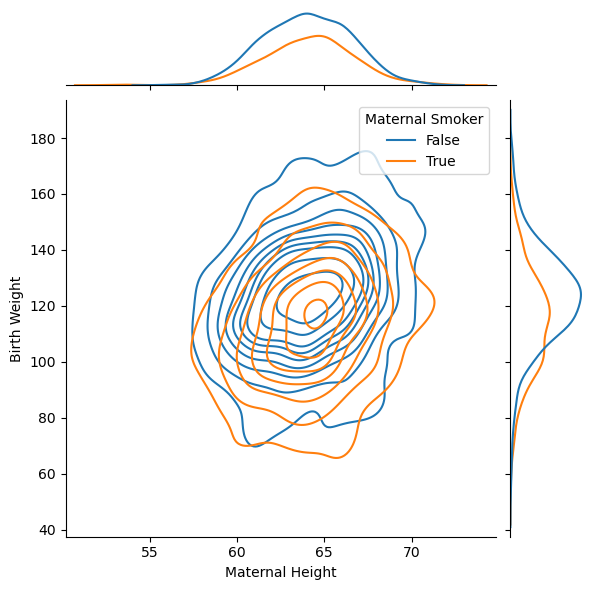

In [35]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind = 'kde', hue = 'Maternal Smoker');